## Especificación del filtro
\begin{align}
    &f_s = 48kHz \\
    &f_{a_1} = 2kHz \\
    &f_{p_1} = 2.2kHz \\
    &f_{p_2} = 3kHz \\
    &f_{a_2} = 3.2kHz \\
    &A_p = 1dB \\
    &A_a = 40dB 
\end{align}

In [2]:
fs = 48000
fa1 = 2000
fp1 = 2200
fp2 = 3000
fa2 = 3200
ap = 1
aa = 40

In [51]:
%matplotlib notebook

from matplotlib import pyplot
from scipy import signal
from cmath import phase
import numpy as np


def hbp(wc1: float, wc2: float, fs: float, N: int):
    """ Respuesta impulsiva de un filtro pasa-banda
        ideal, con frecuencia de corte wc.
        :param wc1: Frecuencia de corte inferior
        :param wc2: Frecuencia de corte superior
        :param fs: Frecuencia de muestreo
        :param N: Longitud del filtro FIR
    """
    h = np.zeros(N)
    l = int((N - 1) / 2)
    for n in range(-l, l + 1):
        if n == 0:
            h[n + l] = 2 * (wc2 - wc1) / (2 * np.pi * fs)
        else:
            h[n + l] = (-np.sin(n * wc1 / fs) + np.sin(n * wc2 / fs)) / (n * np.pi)
    return h


def hhp(wc: float, fs: float, N: int):
    """ Respuesta impulsiva de un filtro pasa-altos
        ideal, con frecuencia de corte wc.
        :param wc: Frecuencia de corte del filtro ideal
        :param fs: Frecuencia de muestreo
        :param N: Longitud del filtro FIR
    """
    h = np.zeros(N)
    l = int((N - 1) / 2)
    for n in range(-l, l + 1):
        if n == 0:
            h[n + l] = 1 - 2 * (wc / (2 * np.pi * fs))
        else:
            h[n + l] = - np.sin(n * wc / fs) / (n * np.pi)
    return h


def hlp(wc: float, fs: float, N: int):
    """ Respuesta impulsiva de un filtro pasa-bajos
        ideal, con frecuencia de corte wc.
        :param wc: Frecuencia de corte del filtro ideal
        :param fs: Frecuencia de muestreo
        :param N: Longitud del filtro FIR
    """
    h = np.zeros(N)
    l = int((N - 1) / 2)
    for n in range(-l, l + 1):
        if n == 0:
            h[n + l] = 2 * (wc / (2 * np.pi * fs))
        else:
            h[n + l] = np.sin(n * wc / fs) / (n * np.pi)
    return h


def kaiser(N: int, alfa: float):
    """ Ventana de Kaiser.
        :param N: Longitud de la ventana
        :param alfa: Coeficiente de forma
    """
    return signal.kaiser(N, alfa)


def hamming(N: int):
    """ Ventana de Hamming.
        :param N: Longitud de la ventana
    """
    w = np.zeros(N)
    for n in range(N):
        w[n] = 0.54 - 0.46 * np.cos( (2 * np.pi * n) / (N - 1))
    return w


def blackman(N: int):
    """ Ventana de Blackman.
        :param N: Longitud de la ventana
    """
    w = np.zeros(N)
    for n in range(N):
        w[n] = 0.42 - 0.5 * np.cos( (2 * np.pi * n) / (N - 1) ) + 0.08 * np.cos( (4 * np.pi * n) / (N - 1) )
    return w

def plot(h, fs):
    """ Grafica la respuesta impulsiva y su respuesta en frecuencia
        :param h: Respuesta impulsiva
        :param fs: Frecuencia de muestreo
    """
    N = len(h)
    w, H = signal.freqz(h, worN=4096)
    m = 20 * np.log10(np.abs(H))
    p = np.unwrap(np.array([phase(H_i) for H_i in H]))
    
    fig, (ax1, ax2) = pyplot.subplots(2, 1)

    fig.set_figwidth(10)
    fig.set_figheight(7)
    
    ax1.stem(h, label="$h(n)$", use_line_collection=True)
    ax1.set_xlabel("Tiempo discreto [n]")
    ax1.grid()
    
    ax2.semilogx(w  * fs / (2 * np.pi), m, label="$|H(\omega)|$")
    ax3 = ax2.twinx()
    ax3.semilogx(w * fs / (2 * np.pi), p, label="$\\theta (\omega)$", color="red")
    ax2.set_xlabel("Frecuencia [Hz]")
    ax2.grid(which="both")
    
    fig.legend(fontsize=15)
    
    pyplot.show()

In [52]:
N = 537
alfa = 3.3953
wc1 = 2 * np.pi * 2100
wc2 = 2 * np.pi * 3100
h = hbp(wc1, wc2, fs, N) * kaiser(N, alfa)

<IPython.core.display.Javascript object>


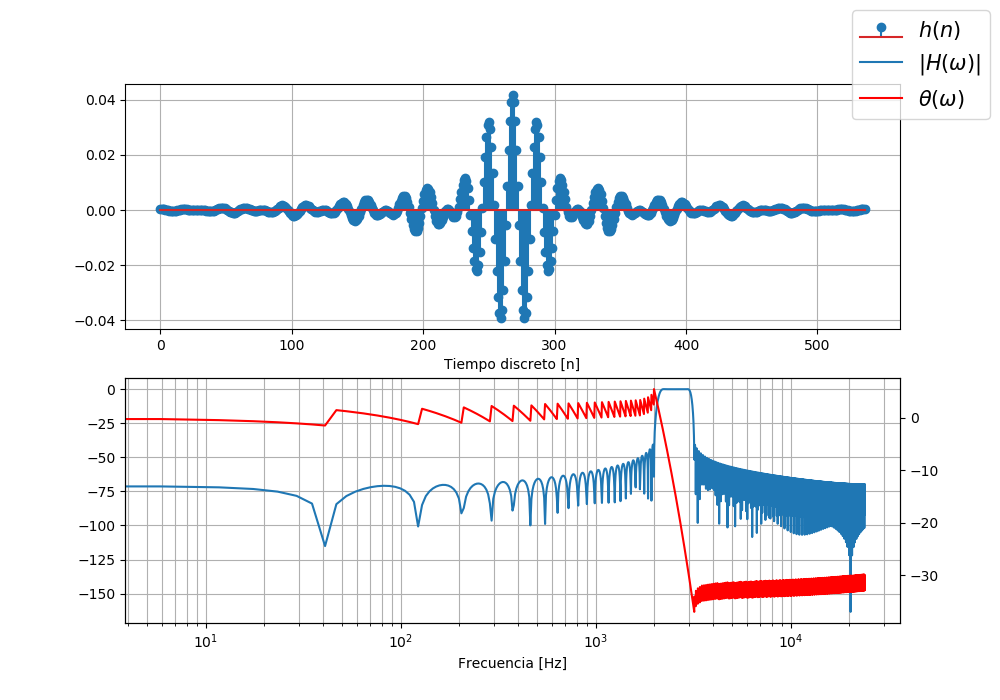

In [53]:
plot(h, fs)